## Initialization and Data Loading:

In [1]:
#libraries 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
df = pd.read_csv('games.csv')

## Data Preprocessing:

In [3]:
#2.1 Rename Column Headers to Lowercase.

df.columns =df.columns.str.lower() 


In [4]:
#2.3 If necessary, decide how to handle missing values.

#estudo=df[df[''].isna()]
#print(' total_sales min =',estudo['total_sales'].min(),'  max = ',estudo['total_sales'].max(),'total = ',estudo['total_sales'].sum()/8915.71)
df['rating'].describe()


count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [5]:

    # There are two apparent input errors in the name column; these entries will be dropped from the dataset.
    
estudo=df[df['name'].isna()]
print(estudo)
df.dropna(subset=['name'],inplace=True)

    
    


      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


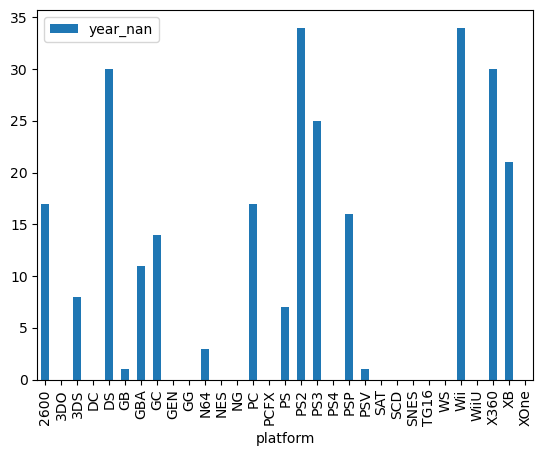

In [6]:
    #In the year_of_release column, I will replace missing values with the median year for each platform, as the release years vary significantly between platforms.

# Exploratory analysis of the distribution of missing values (NaN) across different platforms
df['year_nan']=df['year_of_release'].isna()
grb_year_nan = df.groupby(['platform']).agg({'year_nan':'sum'})
grb_year_nan.plot( kind='bar')
df.dropna(subset=['year_of_release'],inplace=True)

df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
    
    

In [7]:
    # The same rows identified as input errors in the name column also contain invalid values in the genre column and will be dropped from the dataset.
estudo=df[df['genre'].isna()]
print(estudo)


Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, year_nan]
Index: []


In [8]:

    #The sales-related columns are fully populated; no action is needed.
    


In [10]:
    # The `critic_score` column contains approximately 51% missing values, which is significant.
    # I will postpone the decision on how to handle these missing values for now.



In [11]:

    # The `user_score` column has 31% missing values, and if we include the 'tbd' entries, this increases to 55%.
    # There appears to be a correlation with the `rating` and `critic_score` columns, which also have many missing values in common.
    # At this point, I’m not sure how to handle the 'tbd' values.

In [13]:

    # In the `rating` column, I noticed a relationship between missing values and low sales in Japan.
    # I will create a new category called 'undefined' to replace these NaN values. 


In [14]:

    # The game 'Strongest Tokyo University Shogi DS' has an incorrect release year listed as 1985.
    # I will correct it to 2007.
df.loc[15957,'year_of_release'] = 2007.0   


In [17]:

#Pay attention to the abbreviation TBD (to be determined).
    #I will check at the end, when these data become necessary. With the selection of platform and year of interest, the amount of TBD data was reduced.


In [18]:
#2.4Calculate the total sales for each game and store these values in a separate column.
df['total_sales']= df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']


## Analyze the data

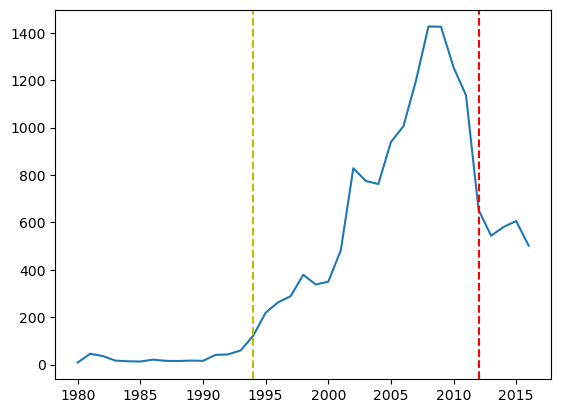

In [19]:
#3.1 Check how many games were released in different years. Are the data from each period significant?


plt.plot(df['year_of_release'].value_counts().sort_index())
plt.axvline(x=2012, color = 'r', linestyle= '--') # Note: There was a decline in releases in 2012, dropping from 1,136 in 2011 to 653 in 2012.
plt.axvline(x=1994, color = 'y', linestyle= '--')

# Games released before 1995 each represent less than 1% of total releases (1980–1994 all under 1%).
# Note: There was a decline in releases in 2012, dropping from 1,136 in 2011 to 653 in 2012.

<Axes: xlabel='platform'>

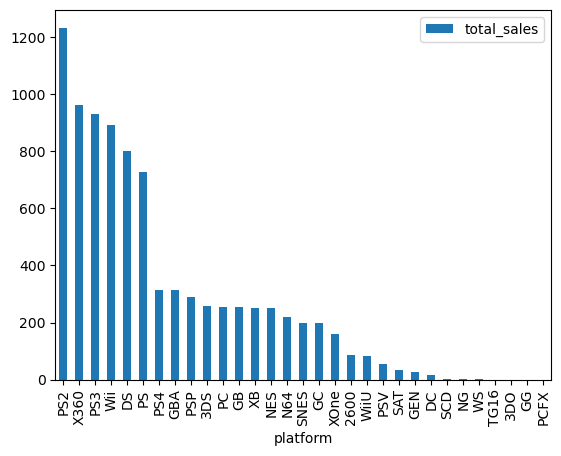

In [20]:
#3.2 Analyze how sales varied across different platforms.
grb_plataform_sales = df.groupby(['platform']).agg({'total_sales':'sum'})
grb_plataform_sales = grb_plataform_sales.sort_values('total_sales',ascending = False).reset_index()
grb_plataform_sales.plot.bar(x = 'platform', y = 'total_sales')
#grb_plataform_sales.head()


In [21]:
#3.3.1 Select the platforms with the highest total sales.

grb_plataform_sales['total'] = grb_plataform_sales['total_sales'].sum() # Calculating total sales to identify platforms that together represent 80% of overall sales
limite = grb_plataform_sales['total_sales'].sum() * 0.7
top_platform = [] # Selecting platforms that represent the main share of total sales
acumulado_de_vendas =0.0
for _, row in grb_plataform_sales.iterrows():
    if acumulado_de_vendas < limite :
        top_platform.append(row['platform'])
        acumulado_de_vendas = acumulado_de_vendas + row['total_sales']
    else:
        break


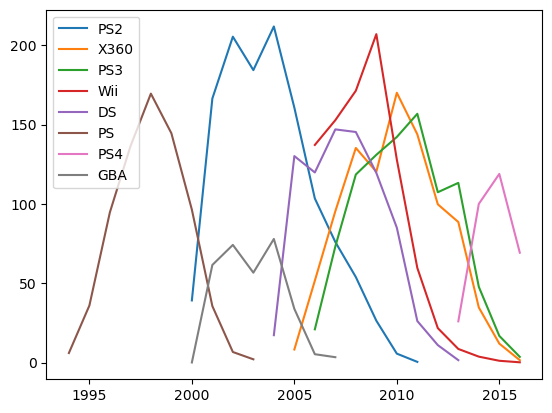

In [22]:
#3.3.2 Construct a distribution of sales data for each year.

def plot_graf_vendas_ano(plataformas,data_frame):
    #Group by operation
    for plataformas in top_platform :
        filtro_wii = data_frame[data_frame['platform']== plataformas]
        grb_wii = filtro_wii.groupby(['year_of_release','platform']).agg({'total_sales':'sum'})
        grb_wii = grb_wii.reset_index()
        grb_wii = grb_wii.sort_values('year_of_release')
        #plot
        plt.plot(grb_wii['year_of_release'], grb_wii['total_sales'],label= plataformas)
    plt.legend()
    plt.show()
    return None

plot_graf_vendas_ano(top_platform,df)

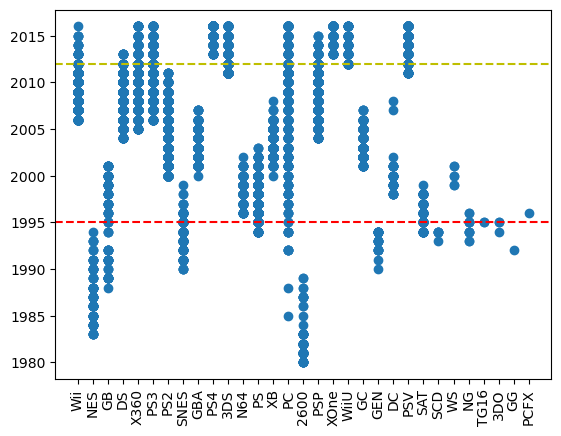

Wii Sales start: 2006.0 Last sale: 2016.0 Lifetime: 10.0
NES Sales start: 1983.0 Last sale: 1994.0 Lifetime: 11.0
GB Sales start: 1988.0 Last sale: 2001.0 Lifetime: 13.0
DS Sales start: 2004.0 Last sale: 2013.0 Lifetime: 9.0
X360 Sales start: 2005.0 Last sale: 2016.0 Lifetime: 11.0
PS3 Sales start: 2006.0 Last sale: 2016.0 Lifetime: 10.0
PS2 Sales start: 2000.0 Last sale: 2011.0 Lifetime: 11.0
SNES Sales start: 1990.0 Last sale: 1999.0 Lifetime: 9.0
GBA Sales start: 2000.0 Last sale: 2007.0 Lifetime: 7.0
PS4 Sales start: 2013.0 Last sale: 2016.0 Lifetime: 3.0
3DS Sales start: 2011.0 Last sale: 2016.0 Lifetime: 5.0
N64 Sales start: 1996.0 Last sale: 2002.0 Lifetime: 6.0
PS Sales start: 1994.0 Last sale: 2003.0 Lifetime: 9.0
XB Sales start: 2000.0 Last sale: 2008.0 Lifetime: 8.0
PC Sales start: 1985.0 Last sale: 2016.0 Lifetime: 31.0
2600 Sales start: 1980.0 Last sale: 1989.0 Lifetime: 9.0
PSP Sales start: 2004.0 Last sale: 2015.0 Lifetime: 11.0
XOne Sales start: 2013.0 Last sale: 2016.0

In [23]:
#3.4 Identify platforms that used to be popular but now have little or no sales.
plt.scatter(df['platform'],df['year_of_release'])
plt.axhline(y=1995,color='r' ,linestyle= '--' ) # Cut-off line: games released before 1995 account for less than 1% of sales
plt.axhline(y=2012,color='y' ,linestyle= '--' )# Note: In section 3.1 we observed a sales decline; here we see the yellow line near the end of the PS2 era.
plt.xticks(rotation = 90)
plt.show()

#How long does it take for new platforms to emerge and old ones to disappear?
platform_list=df['platform'].unique()
contagem = 0
acumulado= 0
tempo_de_vida = 0
def nasc_morte_platform(platforma):
    filtro_nm = df[df['platform'] == platforma]
    minimo_nm = filtro_nm['year_of_release'].min()
    max_nm = filtro_nm['year_of_release'].max()
    tempo_de_vida = max_nm - minimo_nm    
    print(platforma, 'Sales start:', minimo_nm, 'Last sale:', max_nm, 'Lifetime:', tempo_de_vida)
    return  None 
for row in platform_list:
    nasc_morte_platform(row)

  

# Determine the period of data to use.

- The period from 1995 to 2012 represents the "golden age of games,"  
  covering approximately 70% of sales and excluding many old platforms.

- Alternatively, we might consider the average platform lifespan of 6 years and focus on data from 2010 onward.

# The data should allow you to build a model for 2017.

- Yes.

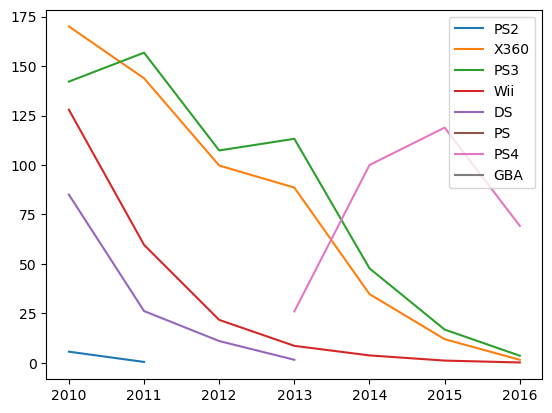

   platform  total_sales
0       PS3       587.74
1      X360       550.41
2       PS4       314.14
3       3DS       257.81
4       Wii       222.97
5      XOne       159.32
6        DS       123.75
7        PC       121.96
8      WiiU        82.19
9       PSP        64.05
10      PSV        53.81
11      PS2         6.09


In [24]:
# Work only with the data  identified as relevant.
# Disregard data from earlier years.
df_2=df[df['year_of_release']>2009]
#Which platforms are leading in sales? Which ones are growing or declining?
list_platform = df_2['platform'].unique()
plot_graf_vendas_ano(list_platform,df_2)

ssd = df_2.groupby(['platform']).agg({'total_sales':'sum'}).sort_values('total_sales',ascending = False).reset_index()
print(ssd)

# Selection of potentially profitable platforms:
# PS4 – highest sales in 2016
# PS3, Xbox 360 – highest cumulative sales

<Axes: xlabel='platform', ylabel='total_sales'>

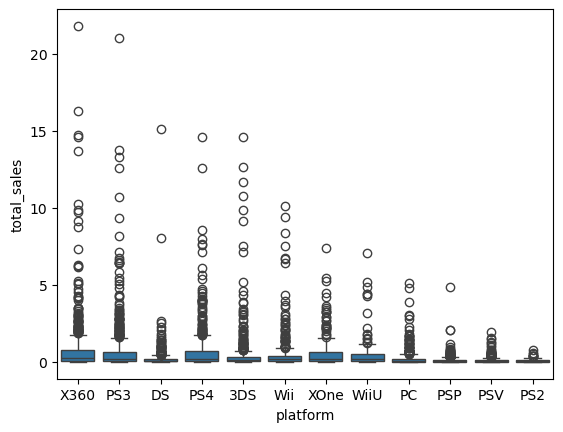

In [25]:
# Build a box plot for global sales of all games, grouped by platform
sns.boxplot(x = 'platform', y = 'total_sales', data = df_2 )
        
# Are the differences in sales significant?
# Yes.


corelação : 0.4005940935202247


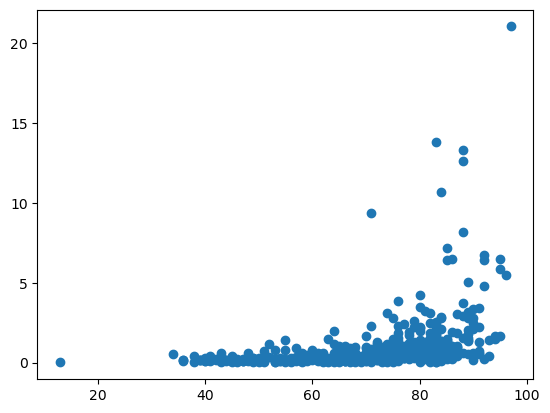

In [26]:
# Analyze how user and critic ratings affect sales on a popular platform (your choice).
# Create a scatter plot and calculate the correlation between reviews and sales.
# Critic reviews
df_2_ps3= df_2[df_2['platform'] == 'PS3']
plt.scatter(df_2_ps3['critic_score'] ,df_2_ps3['total_sales'])
print('corelação :', df_2_ps3['critic_score'].corr(df_2_ps3['total_sales']))
# Conclusions:
        # There is no strong correlation.

C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\59867285.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_user_score['user_score'] = df_2_user_score['user_score'].astype(float)
C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\59867285.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obje

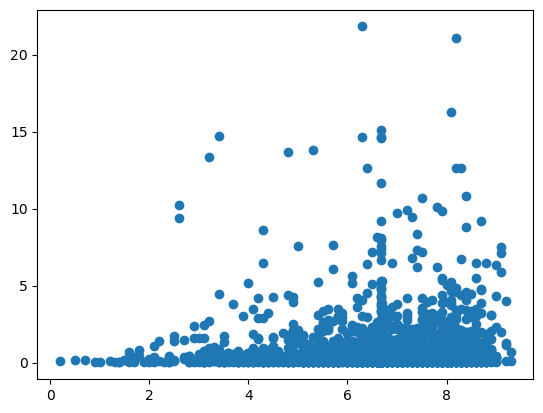

correlation : 0.04818479992539329


In [27]:
# User reviews

# Filtering out 'tbd' data
df_2_user_score = df_2[df_2['user_score'] != 'tbd']
# Conversion to float
df_2_user_score['user_score'] = df_2_user_score['user_score'].astype(float)
# Replacing NaN values with the mean
df_2_user_score_mean=df_2_user_score['user_score'].mean()
df_2_user_score['user_score'].fillna(value=df_2_user_score_mean,inplace=True)
# Plotting the graph
plt.scatter(df_2_user_score['user_score'] ,df_2_user_score['total_sales'])
plt.show()
print('correlation :', df_2_user_score['user_score'].corr(df_2_user_score['total_sales']))

# There is no strong correlation.

In [28]:
#With these conclusions in mind, compare sales on other platforms.

<Axes: xlabel='genre'>

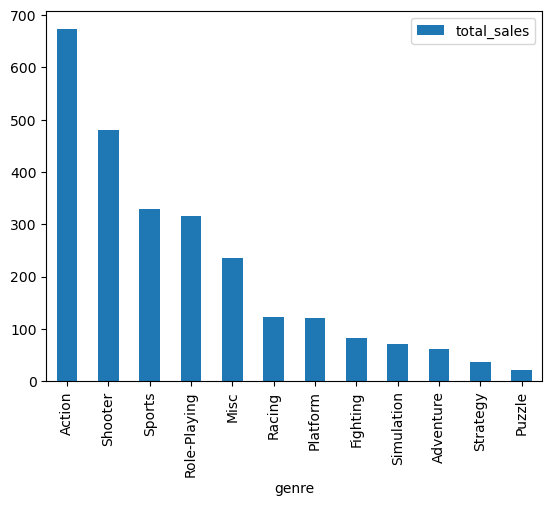

In [29]:
#Overall distribution of games by genre.
grb_genre_sales = df_2.groupby(['genre']).agg({'total_sales':'sum'})
grb_genre_sales = grb_genre_sales.sort_values('total_sales', ascending = False)
grb_genre_sales.plot.bar()

# What can we say about the most profitable genres?
# The top 3 are: Action, Sports, Shooter

# Can you generalize about genres with high and low sales?
# Yes, there are games with high sales (>350), medium, and low sales (<150).

## Create a user profile for each region

             EUA      JP      EU  Other
platform                               
3DS        82.65  100.62   61.27  13.27
DS         59.66   27.90   28.06   8.13
PC         39.07    0.00   68.82  14.07
PS2         2.32    0.80    1.67   1.30
PS3       229.25   59.26  213.60  85.63
PS4       108.74   15.96  141.09  48.35
PSP         9.65   42.20    7.59   4.61
PSV        12.47   21.84   13.07   6.43
Wii       121.20   17.75   65.91  18.11
WiiU       38.10   13.01   25.13   5.95
X360      334.18    5.46  163.41  47.36
XOne       93.12    0.34   51.59  14.27


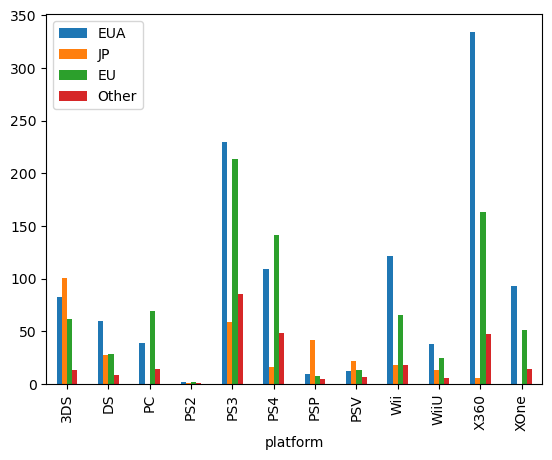

In [30]:
# The top five platforms.
# Profiles:    
    #EUA
grb_plat_na_sales = df_2.groupby(['platform']).agg({'na_sales':'sum'})
grb_plat_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_plat_jp_sales = df_2.groupby(['platform']).agg({'jp_sales':'sum'})
grb_plat_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_plat_eu_sales = df_2.groupby(['platform']).agg({'eu_sales':'sum'})
grb_plat_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_plat_other_sales = df_2.groupby(['platform']).agg({'other_sales':'sum'})
grb_plat_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

# Merging profiles
concat_perfis_plat=pd.concat([grb_plat_na_sales,grb_plat_jp_sales,grb_plat_eu_sales,grb_plat_other_sales], axis='columns')

#ploting
concat_perfis_plat.plot(kind="bar")
print(concat_perfis_plat)

# Describe the variations in their market shares across regions.
# USA - Xbox 360
# Japan - 3DS
# Europe - PS3
# Other - PS3

                 EUA      JP      EU  Other
genre                                      
Action        290.64   72.20  233.63  76.62
Adventure      20.84   15.67   18.88   5.61
Fighting       39.05   13.90   20.33   8.31
Misc          123.80   24.29   66.09  20.38
Platform       54.90   15.81   38.30  10.71
Puzzle          9.10    3.40    6.58   1.52
Racing         46.11    6.68   54.75  15.14
Role-Playing  112.05  103.54   75.48  24.21
Shooter       237.47   14.04  171.45  56.78
Simulation     26.39   13.30   26.39   5.67
Sports        156.81   15.51  116.84  39.23
Strategy       13.25    6.80   12.49   3.30


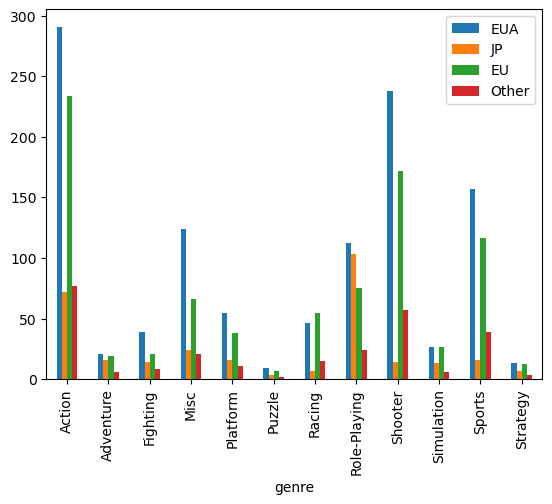

In [31]:
# The top five genres. Explain the differences.
 #EUA
grb_genre_na_sales = df_2.groupby(['genre']).agg({'na_sales':'sum'})
grb_genre_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_genre_jp_sales = df_2.groupby(['genre']).agg({'jp_sales':'sum'})
grb_genre_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_genre_eu_sales = df_2.groupby(['genre']).agg({'eu_sales':'sum'})
grb_genre_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_genre_other_sales = df_2.groupby(['genre']).agg({'other_sales':'sum'})
grb_genre_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

# Merging profiles
concat_perfis=pd.concat([grb_genre_na_sales,grb_genre_jp_sales,grb_genre_eu_sales,grb_genre_other_sales], axis='columns')

#ploting
concat_perfis.plot(kind="bar")
print(concat_perfis)
# Describe the variations in market shares across regions.
# Regardless of genre, the USA consistently leads in sales.
#EUA -Action
#JP - Role-plaing
#EU - Action
#other - action

           EUA     JP      EU  Other
rating                              
E       271.15  47.87  197.34  60.04
E10+    159.38  13.22   99.28  31.15
EC        1.13   0.00    0.00   0.07
M       382.22  30.45  292.04  96.98
RP        0.00   0.00    0.03   0.01
T       160.81  42.11  113.08  38.72


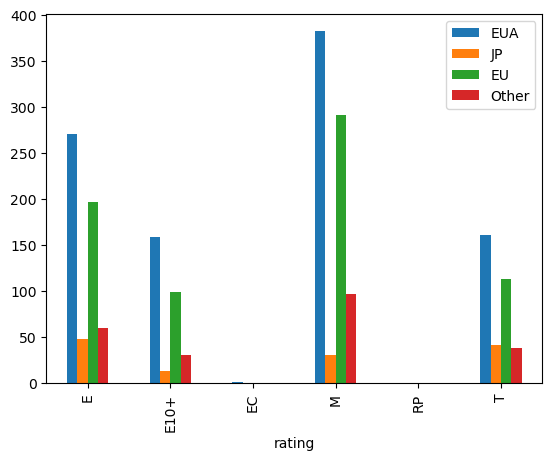

In [32]:
# Do ESRB ratings affect sales in individual regions?
# Profiles:   
    #EUA
grb_rating_na_sales = df_2.groupby(['rating']).agg({'na_sales':'sum'})
grb_rating_na_sales.rename(columns={'na_sales': 'EUA'},inplace = True)
    #JP
grb_rating_jp_sales = df_2.groupby(['rating']).agg({'jp_sales':'sum'})
grb_rating_jp_sales.rename(columns={'jp_sales': 'JP'},inplace = True)
    #EU
grb_rating_eu_sales = df_2.groupby(['rating']).agg({'eu_sales':'sum'})
grb_rating_eu_sales.rename(columns={'eu_sales': 'EU'},inplace = True)
    #Other
grb_rating_other_sales = df_2.groupby(['rating']).agg({'other_sales':'sum'})
grb_rating_other_sales.rename(columns={'other_sales': 'Other'},inplace = True)

# Merging profiles
concat_perfis_rating=pd.concat([grb_rating_na_sales,grb_rating_jp_sales,grb_rating_eu_sales,grb_rating_other_sales], axis='columns')

#ploting
concat_perfis_rating.plot(kind="bar")
print(concat_perfis_rating)

# Do ESRB ratings affect sales in individual regions?

# USA - M
# Japan - "Not defined"
# Europe - M
# Other - M

# Rating M is the preferred classification in most regions (3 out of 4).

## Hypothesis Testing
Define the alpha threshold value yourself.

In [33]:
#The average user ratings for the Xbox One and PC platforms are the same.
df_2_xboxone=df_2[df_2['platform']== 'XOne']
df_2_pc=df_2[df_2['platform']== 'PC']

# Removing rows with 'TBD'
df_2_pc = df_2_pc[df_2_pc['user_score'] != "tbd"]
df_2_xboxone = df_2_xboxone[df_2_xboxone['user_score'] != "tbd"]
#Converting string to float
df_2_pc['user_score']=df_2_pc['user_score'].astype(float)
df_2_xboxone['user_score']=df_2_xboxone['user_score'].astype(float)
#Filling NaN values with the mean
pc_mean=df_2_pc['user_score'].mean()
df_2_pc['user_score'].fillna(value=pc_mean,inplace=True)
xbox_mean=df_2_pc['user_score'].mean()
df_2_xboxone['user_score'].fillna(value=xbox_mean,inplace=True)

alpha = 0.05
results = st.ttest_ind(df_2_pc['user_score'],df_2_xboxone['user_score'])
print('valor-p: ', results.pvalue) # Extracting the p-value

if results.pvalue < alpha: # Comparing the p-value with the threshold
    print("We reject the null hypothesis")
    print()
    print('The average user ratings for the Xbox One and PC platforms are not the same.')
else:
    print("We cannot reject the null hypothesis")
    print()
    print('The average user ratings for the Xbox One and PC platforms are the same.')

valor-p:  0.9815863311035156
We cannot reject the null hypothesis

The average user ratings for the Xbox One and PC platforms are the same.


C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\438004610.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2_pc['user_score'].fillna(value=pc_mean,inplace=True)
C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\438004610.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [34]:
# The average user ratings for the Action and Sports genres are different.

# H0: The average user ratings for the Action and Sports genres are the same.

df_2_Action=df_2[df_2['genre']== 'Action']
df_2_Sports=df_2[df_2['genre']== 'Sports']

# Removing rows with 'TBD'
df_2_Action = df_2_Action[df_2_Action['user_score'] != "tbd"]
df_2_Sports = df_2_Sports[df_2_Sports['user_score'] != "tbd"]
#Converting string to float
df_2_Action['user_score']=df_2_Action['user_score'].astype(float)
df_2_Sports['user_score']=df_2_Sports['user_score'].astype(float)
#Filling NaN values with the mean
Action_mean=df_2_Action['user_score'].mean()
df_2_Action['user_score'].fillna(value=Action_mean,inplace=True)
Sports_mean=df_2_Sports['user_score'].mean()
df_2_Sports['user_score'].fillna(value=Sports_mean,inplace=True)

alpha = 0.05
results = st.ttest_ind(df_2_Sports['user_score'],df_2_Action['user_score'])
print('valor-p: ', results.pvalue) # # Extracting the p-value

if results.pvalue < alpha: # Comparing the p-value with the threshold
    print("We reject the null hypothesis")
    print()
    print('The average user ratings for the Action and Sports genres are not the same.')
else:
    print("We cannot reject the null hypothesis")
    print()
    print('The average user ratings for the Action and Sports genres are the same.')
    


valor-p:  7.431960488138697e-45
We reject the null hypothesis

The average user ratings for the Action and Sports genres are not the same.


C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\3372484195.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2_Action['user_score'].fillna(value=Action_mean,inplace=True)
C:\Users\aswit\AppData\Local\Temp\ipykernel_9848\3372484195.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Explanation:
— How to formulate the null and alternative hypotheses.

The null hypotheses should be those that do not indicate any changes; they should state that the values are equal. The alternative hypotheses should be the opposite of the null hypotheses.

— What criteria are used to test the hypotheses, and why

In both cases, I used an alpha of 0.05 because this implies a 5% chance of rejecting the hypothesis.



## General conclusion

Sales decline in 2012, dropping from 1,136 sales in 2011 to 653 in 2012.

The average lifespan of the platforms is 6 years.

There is no strong correlation between reviews and sales.

The top 3 genres are: Action, Sports, Shooter.

Favorite platform by region:
USA – X360
Japan – 3DS
Europe – PS3
Other – PS3

Japan is the only region with a preference for the Role-Playing genre; the others prefer Action.

Japan shows a preference for unrated games, while other regions prefer games rated M.

The average user ratings for Xbox One and PC platforms are the same.

The average user ratings for the genres Action and Sports are NOT the same.

Se quiser, posso ajudar a formatar isso num texto corrido também!
